In [2]:
%matplotlib inline

In [58]:
import numpy as np
import pandas as pd
import csv 
        
number = 0
pixels = []
datatype = {}
while (number <= 783):
   label = 'pixel' + str(number)
   number = number + 1
   pixels.append(label)
   datatype[label] = int
training_data = pd.read_csv("/Users/joanneloh/Documents/Applied Machine Learning/Homework 1/MNIST dataset/train.csv",
                    header = None,
                    names = pixels,
                    dtype = object)
test_data = pd.read_csv("/Users/joanneloh/Documents/Applied Machine Learning/Homework 1/MNIST dataset/test.csv",
                    header = None,
                    names = pixels,
                    dtype = object)

In [4]:
#1d) : need to do this also for 0, 2-9
from scipy.spatial import distance

dst = {}
first_vector = np.array(training_data.iloc[1], dtype= 'uint8')
rgbvar1 = [x / 255.0 for x in first_vector]
index = 2

def getDigit(digit): 
    count = 0
    for index, label in training_data.iterrows(): 
        #print ("comes here")
        print (index)
        if (index == digit): 
            print("Sample digit ",index," was found.")
            return count
        count = count + 1
#print ("At Index : ",getDigit("8"))
solutions = {}
for digit in range(10):
    digit_index = getDigit(str(digit))
    first_vector = np.array(training_data.iloc[digit_index], dtype= 'uint8')
    rgbvar1 = [x / 255.0 for x in first_vector]
    index = digit_index + 1
    dst = {}
    while index <= 42000:
        comparison_vector = np.array(training_data.iloc[index], dtype= 'uint8')
        rgbvarcompare = [x / 255.0 for x in comparison_vector]
        dist = distance.euclidean(rgbvar1, rgbvarcompare)
        #print ("Line "+ str(index) + ": "+ str(dist))
        index += 1
        dst[dist] = index
        #print (str(dst))

    x = min(float(s) for s in dst.keys())
    print(dst[x])
    solutions[digit] = dst[x]
print (str(solutions))




label
1
0
Sample digit  0  was found.


KeyboardInterrupt: 

In [5]:
#1e
#Genuine match for 0 (we need to compare 0-0, 1-1)
#Imposter match
genuine_dst = []
vector_one = []
vector_zero = []

index = 0

for label, row in training_data.iterrows():

  if label == '1':
    row_one = np.array(training_data.iloc[index], dtype= 'uint8')
    scaled_row_one = [x / 255.0 for x in row_one]
    vector_one.append(scaled_row_one)
    

  if label == '0':
    row_zero = np.array(training_data.iloc[index], dtype= 'uint8')
    scaled_row_zero = [x / 255.0 for x in row_zero]
    vector_zero.append(scaled_row_zero)

  index +=1

print(len(vector_zero))
print(len(vector_one))

4132
4684


In [5]:
#computing genuine distances between 0's
distances_0 = distance.pdist(vector_zero, 'euclidean')
#computing genuine distances between 1's
distances_1 = distance.pdist(vector_one, 'euclidean')

#lumping genuine distances together
genuine_distances = np.concatenate((distances_0, distances_1))


In [6]:
print(len(distances_0))
print(len(distances_1))
print(len(genuine_distances))

8534646
10967586
19502232


In [7]:
import itertools
#computing imposter distances between 0 and 1
imposter_dist = distance.cdist(vector_one, vector_zero, metric='euclidean')
#making into 1D array
imposter_distances = list(itertools.chain.from_iterable(imposter_dist))

In [8]:
print(len(imposter_distances))

19354288


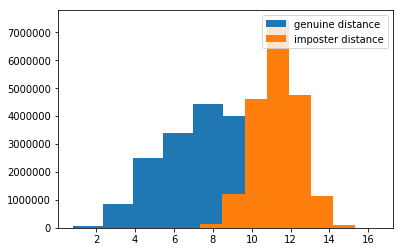

In [9]:
from matplotlib import pyplot

pyplot.hist(genuine_distances, alpha=1.0, label='genuine distance')
pyplot.hist(imposter_distances, alpha=1.0, label='imposter distance')
pyplot.legend(loc='upper right')
pyplot.show()

    

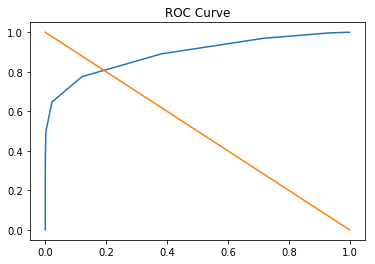

In [10]:
#1f
x_axis = []
y_axis = []

imposter_len = len(imposter_distances)
genuine_len = len(genuine_distances)
false_positive = []
true_positive = []
fpr_list = [] 
tpr_list = [] 

#this is our number of false positives
for threshold in range(0,16):
    false_positive = [] 
    true_positive = []
    for i in imposter_distances:
            if i < threshold:
                false_positive.append(i)

    for j in genuine_distances:
        if j < threshold:
            true_positive.append(j)

    number_fp = len(false_positive)
    number_tp = len(true_positive)

    fpr = number_fp/imposter_len
    tpr = number_tp/genuine_len
    fpr_list.append(fpr)
    tpr_list.append(tpr)

pyplot.plot(fpr_list, tpr_list)
pyplot.title("ROC Curve") 
pyplot.plot([1,0], [0,1])
pyplot.show()
                
        



In [ ]:
#EER is 20%?
#random classifier? error rate of classifer is 50%.

In [35]:
#1g KNN classifier
# a = np.array(temp).reshape(28000,500)
import operator
import numpy as np 
from scipy.spatial import distance

class KNNClassifier:
  def __init__(self, k, train_data, test_data):
    self.k = k
    self.list_of_neighbors = {}
    self.distances = []
    self.prediction = {}
    self.labels = {}
    self.train_data = train_data
    self.test_data = test_data
    count = 0
    for index, item in self.train_data.iterrows(): 
      self.labels[count] = int(index)   
      count = count + 1 
      
    print(self.labels)
# gets all k points closest to one specified data point
  def getNeighbors(self): 
    
    self.distances = distance.cdist(self.test_data, self.train_data, metric='euclidean')
#     print ("Distances: ",self.distances)
    return self.distances
    
  # gets all k neighbors for each test point and stores in dict
  # stores to self.list_of_neighbors
  def get_test_neighbors(self):
    test_index = 0
    for list in self.distances: # a is a list of all distances to points in test data in list 
        count = 1
        distances = []
        for dist in list: 
            distances.append((count,dist))
            count = count + 1
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(self.k): 
            neighbors.append(distances[x])
        self.list_of_neighbors[test_index] = neighbors
        test_index = test_index + 1
#     print ("List of Neighbors: ",self.list_of_neighbors)
    return self.list_of_neighbors 
  
  def predict(self):
    print(self.list_of_neighbors)
    for test_index in self.list_of_neighbors.keys():
        class_votes = {}
        nbrs = self.list_of_neighbors[test_index]
        
        for nbr in nbrs:
            idx = nbr[0]
            label = self.labels[idx -1] # label = 4
            if label in class_votes.keys(): 
                class_votes[label] = class_votes[label] + 1
            else: 
                class_votes[label] = 1
        sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
        self.prediction[test_index] = sorted_votes[0][0]
   
    return self.prediction



In [62]:
#1h perform 3 fold cross-validation
number = 0
pixels = []
datatype = {}
while (number <= 783):
   label = 'pixel' + str(number)
   number = number + 1
   pixels.append(label)
   datatype[label] = int

training_dataCV = pd.read_csv("/Users/joanneloh/Documents/Applied Machine Learning/Homework 1/MNIST dataset/train.csv",
                    header = None,
                    names = pixels,
                    dtype = object)

train_seperate_2_3 = training_dataCV[1:28001]
print(train_seperate_2_3.shape)
test_seperate_1_3 = training_dataCV[28001:42001]

CVclassifier = KNNClassifier(3, train_seperate_2_3, test_seperate_1_3)
tempCV = CVclassifier.getNeighbors()
CVclassifier.get_test_neighbors()


(28000, 784)
<class 'pandas.core.frame.DataFrame'>
{0: 1, 1: 0, 2: 1, 3: 4, 4: 0, 5: 0, 6: 7, 7: 3, 8: 5, 9: 3, 10: 8, 11: 9, 12: 1, 13: 3, 14: 3, 15: 1, 16: 2, 17: 0, 18: 7, 19: 5, 20: 8, 21: 6, 22: 2, 23: 0, 24: 2, 25: 3, 26: 6, 27: 9, 28: 9, 29: 7, 30: 8, 31: 9, 32: 4, 33: 9, 34: 2, 35: 1, 36: 3, 37: 1, 38: 1, 39: 4, 40: 9, 41: 1, 42: 4, 43: 4, 44: 2, 45: 6, 46: 3, 47: 7, 48: 7, 49: 4, 50: 7, 51: 5, 52: 1, 53: 9, 54: 0, 55: 2, 56: 2, 57: 3, 58: 9, 59: 1, 60: 1, 61: 1, 62: 5, 63: 0, 64: 6, 65: 3, 66: 4, 67: 8, 68: 1, 69: 0, 70: 3, 71: 9, 72: 6, 73: 2, 74: 6, 75: 4, 76: 7, 77: 1, 78: 4, 79: 1, 80: 5, 81: 4, 82: 8, 83: 9, 84: 2, 85: 9, 86: 9, 87: 8, 88: 9, 89: 6, 90: 3, 91: 6, 92: 4, 93: 6, 94: 2, 95: 9, 96: 1, 97: 2, 98: 0, 99: 5, 100: 9, 101: 2, 102: 7, 103: 7, 104: 2, 105: 8, 106: 8, 107: 5, 108: 0, 109: 6, 110: 0, 111: 0, 112: 2, 113: 9, 114: 0, 115: 4, 116: 7, 117: 7, 118: 1, 119: 5, 120: 7, 121: 9, 122: 4, 123: 6, 124: 1, 125: 5, 126: 7, 127: 6, 128: 5, 129: 0, 130: 4, 131: 8, 13

{0: [(26278, 1468.8107434247613),
  (5422, 1503.2504781306407),
  (4845, 1510.6587966844133)],
 1: [(15919, 352.932004782791),
  (1993, 462.89847699036557),
  (6774, 477.4505209966788)],
 2: [(7690, 1024.9048736346217),
  (18097, 1211.6880786737154),
  (3691, 1276.8288843850612)],
 3: [(27754, 1105.4564668045505),
  (17920, 1211.486689980538),
  (17026, 1230.2203054737797)],
 4: [(25707, 1019.8931316564496),
  (23384, 1282.522904278906),
  (3752, 1309.0649334544105)],
 5: [(1613, 375.08798967708896),
  (6565, 395.6905356462295),
  (7863, 399.25305258695266)],
 6: [(10212, 1482.0526306444046),
  (16498, 1756.6991774347707),
  (15361, 1774.7757604835604)],
 7: [(21098, 795.8617970477035),
  (24948, 799.8974934327523),
  (7307, 800.4342571379614)],
 8: [(1803, 1390.47114317414),
  (11291, 1464.1557294222496),
  (2938, 1484.9521877824889)],
 9: [(14888, 1438.024339154244),
  (22325, 1482.1413562815121),
  (16450, 1566.4223568373889)],
 10: [(26359, 887.1860007912659),
  (4087, 903.58674182

In [38]:
#1j
test_data_real = test_data[1:501] #28000
train_data_real = training_data[1:501]
classifier = KNNClassifier(3, train_data_real, test_data_real)
temp = classifier.getNeighbors()
classifier.get_test_neighbors()
predict = classifier.predict()
print(predict)

<class 'pandas.core.frame.DataFrame'>
{0: 1, 1: 0, 2: 1, 3: 4, 4: 0, 5: 0, 6: 7, 7: 3, 8: 5, 9: 3, 10: 8, 11: 9, 12: 1, 13: 3, 14: 3, 15: 1, 16: 2, 17: 0, 18: 7, 19: 5, 20: 8, 21: 6, 22: 2, 23: 0, 24: 2, 25: 3, 26: 6, 27: 9, 28: 9, 29: 7, 30: 8, 31: 9, 32: 4, 33: 9, 34: 2, 35: 1, 36: 3, 37: 1, 38: 1, 39: 4, 40: 9, 41: 1, 42: 4, 43: 4, 44: 2, 45: 6, 46: 3, 47: 7, 48: 7, 49: 4, 50: 7, 51: 5, 52: 1, 53: 9, 54: 0, 55: 2, 56: 2, 57: 3, 58: 9, 59: 1, 60: 1, 61: 1, 62: 5, 63: 0, 64: 6, 65: 3, 66: 4, 67: 8, 68: 1, 69: 0, 70: 3, 71: 9, 72: 6, 73: 2, 74: 6, 75: 4, 76: 7, 77: 1, 78: 4, 79: 1, 80: 5, 81: 4, 82: 8, 83: 9, 84: 2, 85: 9, 86: 9, 87: 8, 88: 9, 89: 6, 90: 3, 91: 6, 92: 4, 93: 6, 94: 2, 95: 9, 96: 1, 97: 2, 98: 0, 99: 5, 100: 9, 101: 2, 102: 7, 103: 7, 104: 2, 105: 8, 106: 8, 107: 5, 108: 0, 109: 6, 110: 0, 111: 0, 112: 2, 113: 9, 114: 0, 115: 4, 116: 7, 117: 7, 118: 1, 119: 5, 120: 7, 121: 9, 122: 4, 123: 6, 124: 1, 125: 5, 126: 7, 127: 6, 128: 5, 129: 0, 130: 4, 131: 8, 132: 7, 133: 6,

In [12]:
import csv

myFile = open('MNIST_submission.csv', 'w')
headers = ['ImageId','Label']

submission_data = []
image_id = 1
for data in predict.keys():
    submission_data.append([image_id, predict[data]])
    image_id = image_id + 1

with myFile:
    writer = csv.writer(myFile)
    writer.writerow(headers)
    writer.writerows(submission_data)

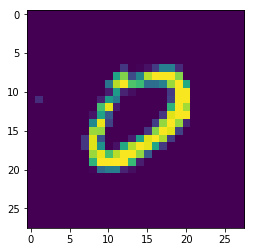

In [31]:
#testing t 
from matplotlib import pyplot
first_row = test_data.iloc[4]
first_image = np.array(first_row, dtype='uint8')
pixels = first_image.reshape((28,28))
pyplot.imshow(np.array(pixels).reshape((28,28)))